<a href="https://www.kaggle.com/code/lalit7881/mercedes-benz-price-ml-100?scriptVersionId=300571364" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mercedes-benz-price-dataset-2005-2025-usa/mercedes_benz_listings_cleaned.csv


In [2]:
df = pd.read_csv('/kaggle/input/mercedes-benz-price-dataset-2005-2025-usa/mercedes_benz_listings_cleaned.csv')

In [3]:
df.head()

,Vehicle_Name,Year,Vehicle_Age,Model_Series,Trim_Level,Body_Type,Is_AMG,Is_4MATIC,Mileage_Miles,Mileage_Category,Price_USD,Price_Category,Price_Per_Mile
0,2025 Mercedes-Benz AMG S 63 E 4MATIC,2025,1,AMG S 63,S 63,Other,1,1,9860,Low (< 20K),151900,Luxury (> $70K),15.405680
1,2025 Mercedes-Benz GLE 580 4MATIC,2025,1,GLE,E 580,SUV,0,1,3154,Low (< 20K),82975,Luxury (> $70K),26.307863
2,2025 Mercedes-Benz GLS 450 4MATIC,2025,1,GLS,S 450,SUV,0,1,15496,Low (< 20K),75500,Luxury (> $70K),4.872225
3,2025 Mercedes-Benz GLE 450e 4MATIC,2025,1,GLE,E 450,SUV,0,1,9303,Low (< 20K),67996,Premium ($40K-$70K),7.309040
4,2025 Mercedes-Benz GLE 450e 4MATIC,2025,1,GLE,E 450,SUV,0,1,17259,Low (< 20K),63928,Premium ($40K-$70K),3.704038


In [4]:
df.tail()

,Vehicle_Name,Year,Vehicle_Age,Model_Series,Trim_Level,Body_Type,Is_AMG,Is_4MATIC,Mileage_Miles,Mileage_Category,Price_USD,Price_Category,Price_Per_Mile
103,2014 Mercedes-Benz E-Class E 250 BlueTEC 4MATIC,2014,12,E-Class,E 250,Sedan,0,1,186500,Very High (> 100K),9650,Budget (< $20K),0.051743
104,2013 Mercedes-Benz GLK-Class GLK 350 4MATIC,2013,13,GLK-Class,GLK 350,Other,0,1,131643,Very High (> 100K),11980,Budget (< $20K),0.091004
105,2012 Mercedes-Benz M-Class ML 350 4MATIC,2012,14,M-Class,Standard,SUV,0,1,118174,Very High (> 100K),11498,Budget (< $20K),0.097297
106,2008 Mercedes-Benz E-Class E 350 Sedan 4D,2008,18,E-Class,E 350,Sedan,0,0,91577,High (50K-100K),7490,Budget (< $20K),0.081789
107,2005 Mercedes-Benz CLK-Class 320 Cabriolet,2005,21,CLK-Class,Standard,Coupe,0,0,93350,High (50K-100K),6420,Budget (< $20K),0.068773


In [5]:
print("Data Types & Info")
print("-----------------")
df.info()

print("\nStatistical Summary")
print("-------------------")
print(df.describe())

Data Types & Info
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Vehicle_Name      108 non-null    object 
 1   Year              108 non-null    int64  
 2   Vehicle_Age       108 non-null    int64  
 3   Model_Series      108 non-null    object 
 4   Trim_Level        108 non-null    object 
 5   Body_Type         108 non-null    object 
 6   Is_AMG            108 non-null    int64  
 7   Is_4MATIC         108 non-null    int64  
 8   Mileage_Miles     108 non-null    int64  
 9   Mileage_Category  108 non-null    object 
 10  Price_USD         108 non-null    int64  
 11  Price_Category    108 non-null    object 
 12  Price_Per_Mile    108 non-null    float64
dtypes: float64(1), int64(6), object(6)
memory usage: 11.1+ KB

Statistical Summary
-------------------
              Year  Vehicle_Age      Is_AMG   Is_4

In [6]:
print("Missing Values Analysis")
print("-----------------------")

missing = df.isnull().sum()
missing_percent = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    "Missing Count": missing,
    "Missing %": missing_percent
})

missing_df = missing_df[missing_df["Missing Count"] > 0]

if not missing_df.empty:
    print(missing_df.sort_values("Missing Count", ascending=False))
else:
    print("No missing values found!")

Missing Values Analysis
-----------------------
No missing values found!


In [7]:
df.columns

Index(['Vehicle_Name', 'Year', 'Vehicle_Age', 'Model_Series', 'Trim_Level',
       'Body_Type', 'Is_AMG', 'Is_4MATIC', 'Mileage_Miles', 'Mileage_Category',
       'Price_USD', 'Price_Category', 'Price_Per_Mile'],
      dtype='object')

In [8]:
# Fill missing Price_Per_Mile with median (if exists)
if 'Price_Per_Mile' in df.columns:
    df['Price_Per_Mile'] = df['Price_Per_Mile'].fillna(df['Price_Per_Mile'].median())

print("Creating additional features...\n")

# Depreciation Index
df['Depreciation_Index'] = df['Price_USD'] / df['Vehicle_Age'].replace(0, 1)

# Miles per Year
df['Miles_Per_Year'] = df['Mileage_Miles'] / df['Vehicle_Age'].replace(0, 1)

# Luxury Tier
df['Is_Luxury_Tier'] = (df['Price_USD'] >= 60000).astype(int)

# Age Category
df['Age_Category'] = pd.cut(
    df['Vehicle_Age'],
    bins=[-1, 2, 5, 10, 100],
    labels=['New', 'Recent', 'Mid-Age', 'Older']
)

print("Feature engineering complete!")
print("Total columns:", df.shape[1])

Creating additional features...

Feature engineering complete!
Total columns: 17


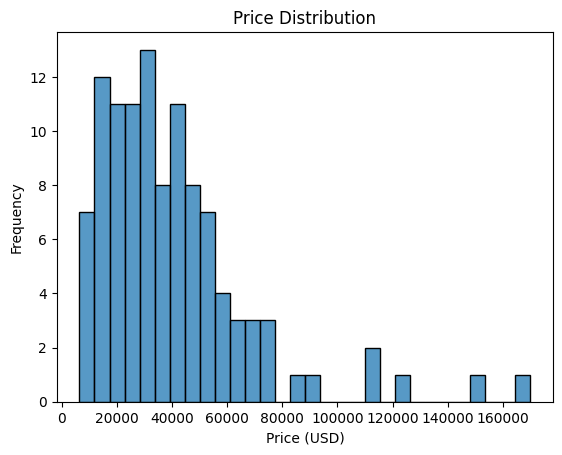

Price Statistics
----------------
count       108.000000
mean      40310.314815
std       28047.141525
min        6420.000000
25%       20603.500000
50%       33499.000000
75%       50243.500000
max      169995.000000
Name: Price_USD, dtype: float64


In [9]:
# Histogram
plt.figure()
sns.histplot(df['Price_USD'], bins=30)
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

# Statistics
print("Price Statistics")
print("----------------")
print(df['Price_USD'].describe())

In [10]:
import plotly.express as px

# Simple box plot
fig = px.box(df, y='Mileage_Miles',
             title='Mileage Distribution',
             labels={'Mileage_Miles': 'Mileage (Miles)'})

fig.show()

# Simple statistics
print("Mileage Statistics")
print("------------------")
print("Mean:", df['Mileage_Miles'].mean())
print("Median:", df['Mileage_Miles'].median())
print("Min:", df['Mileage_Miles'].min())
print("Max:", df['Mileage_Miles'].max())

Mileage Statistics
------------------
Mean: 47528.73148148148
Median: 42701.5
Min: 628
Max: 186500


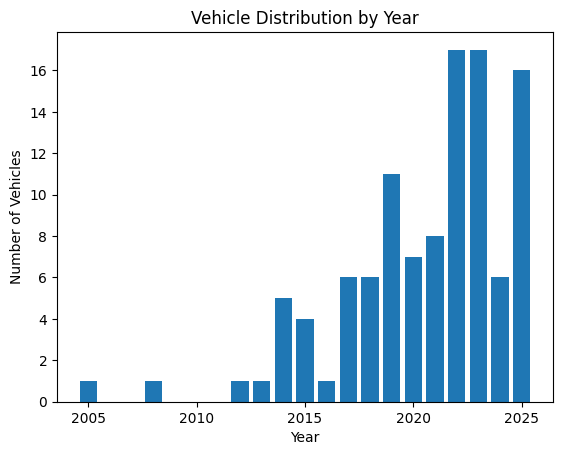

In [11]:
year_counts = df['Year'].value_counts().sort_index()

plt.figure()
plt.bar(year_counts.index, year_counts.values)
plt.title("Vehicle Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Number of Vehicles")
plt.show()

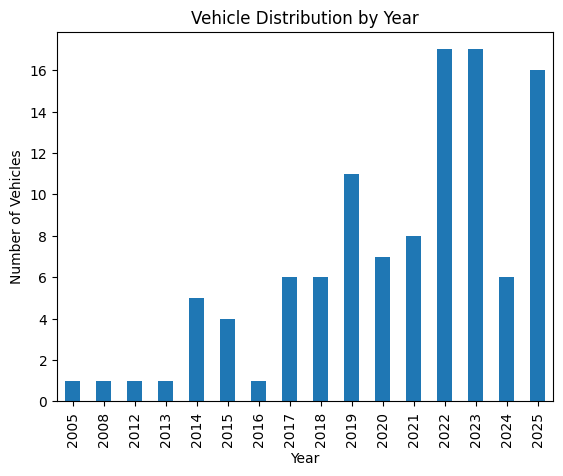

In [12]:
df['Year'].value_counts().sort_index().plot(kind='bar',
                                            title='Vehicle Distribution by Year')
plt.xlabel("Year")
plt.ylabel("Number of Vehicles")
plt.show()

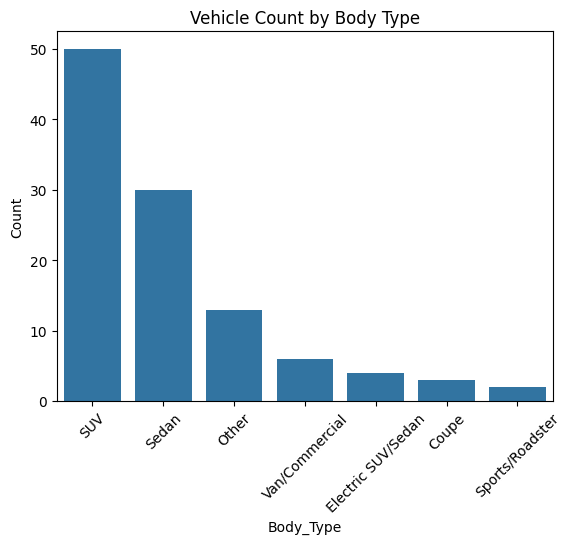

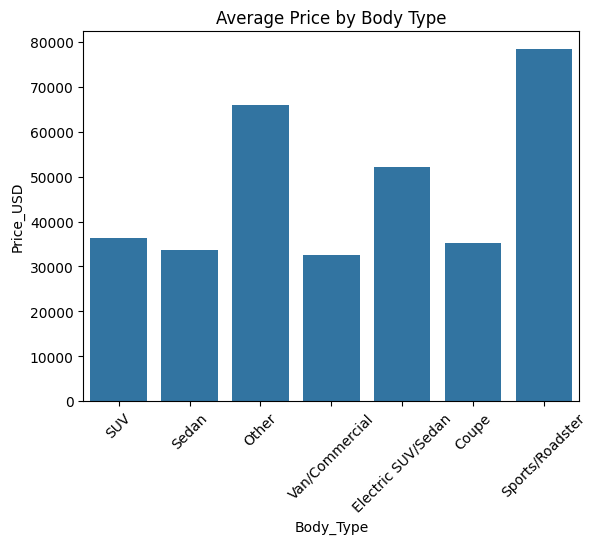

Body Type Statistics
--------------------
            Body_Type     Price_USD  Mileage_Miles  Count
3                 SUV  36405.800000   43449.420000     50
4               Sedan  33593.266667   56116.733333     30
2               Other  66078.461538   52502.153846     13
6      Van/Commercial  32642.166667   52362.000000      6
1  Electric SUV/Sedan  52065.250000   31571.000000      4
0               Coupe  35137.666667   37345.666667      3
5     Sports/Roadster  78439.500000   21054.500000      2


In [13]:
body_type_stats = df.groupby('Body_Type').agg({
    'Price_USD': 'mean',
    'Mileage_Miles': 'mean',
    'Body_Type': 'count'
}).rename(columns={'Body_Type': 'Count'}).reset_index()

# Sort by count
body_type_stats = body_type_stats.sort_values('Count', ascending=False)

# --- Bar Plot: Vehicle Count ---
plt.figure()
sns.barplot(data=body_type_stats, x='Body_Type', y='Count')
plt.title("Vehicle Count by Body Type")
plt.xticks(rotation=45)
plt.show()

# --- Bar Plot: Average Price ---
plt.figure()
sns.barplot(data=body_type_stats, x='Body_Type', y='Price_USD')
plt.title("Average Price by Body Type")
plt.xticks(rotation=45)
plt.show()

# Display statistics
print("Body Type Statistics")
print("--------------------")
print(body_type_stats)

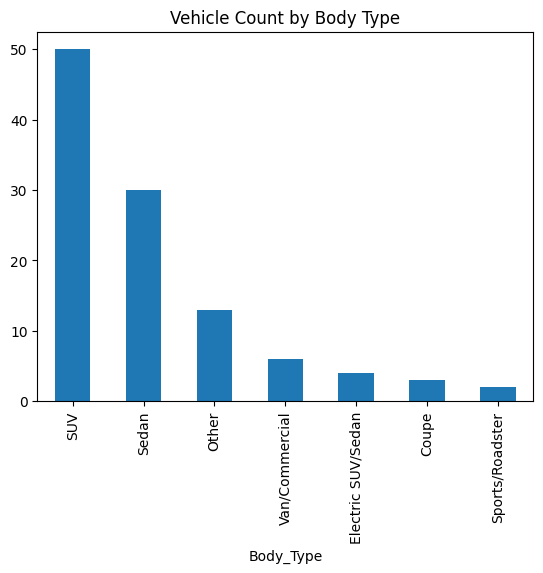

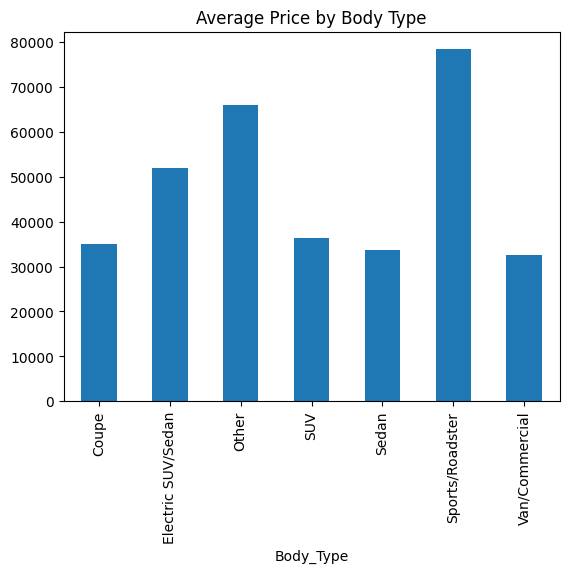

In [14]:
df['Body_Type'].value_counts().plot(kind='bar', title='Vehicle Count by Body Type')
plt.show()

df.groupby('Body_Type')['Price_USD'].mean().plot(kind='bar', title='Average Price by Body Type')
plt.show()

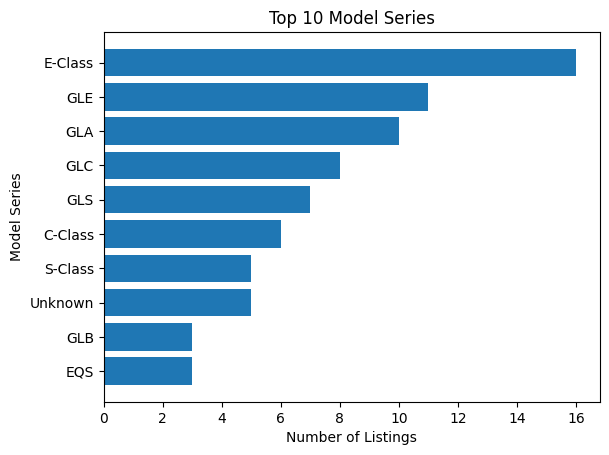

In [15]:
# Top 10 models
top_models = df['Model_Series'].value_counts().head(10)

plt.figure()
plt.barh(top_models.index, top_models.values)
plt.title("Top 10 Model Series")
plt.xlabel("Number of Listings")
plt.ylabel("Model Series")
plt.gca().invert_yaxis()  # Highest at top
plt.show()

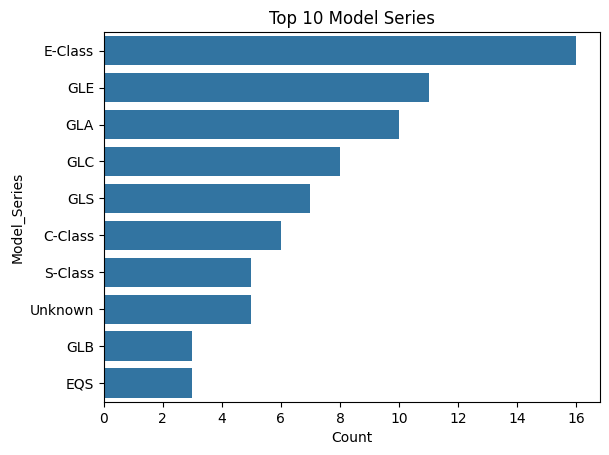

In [16]:
top_models = df['Model_Series'].value_counts().head(10).reset_index()
top_models.columns = ['Model_Series', 'Count']

plt.figure()
sns.barplot(data=top_models, x='Count', y='Model_Series')
plt.title("Top 10 Model Series")
plt.show()

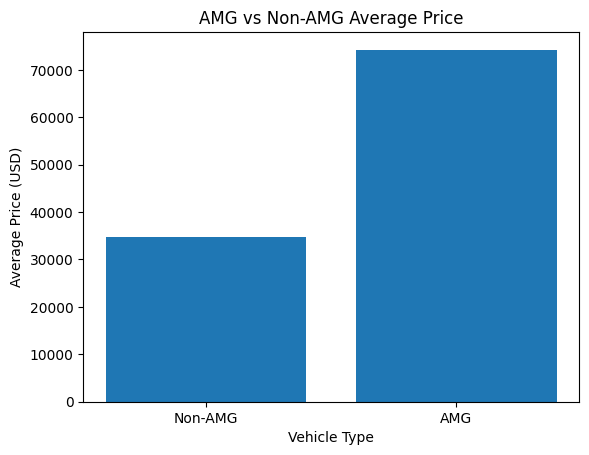

AMG Comparison
--------------
Is_AMG
Non-AMG    34836.645161
AMG        74247.066667
Name: Price_USD, dtype: float64

AMG Premium: 113.1% higher than Non-AMG


In [17]:
amg_comparison = df.groupby('Is_AMG')['Price_USD'].mean()
amg_comparison.index = amg_comparison.index.map({0: 'Non-AMG', 1: 'AMG'})

# Simple bar chart
plt.figure()
plt.bar(amg_comparison.index, amg_comparison.values)
plt.title("AMG vs Non-AMG Average Price")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Price (USD)")
plt.show()

# Display stats
print("AMG Comparison")
print("--------------")
print(amg_comparison)

# Premium %
premium = (amg_comparison['AMG'] / amg_comparison['Non-AMG'] - 1) * 100
print(f"\nAMG Premium: {premium:.1f}% higher than Non-AMG")

<Figure size 640x480 with 0 Axes>

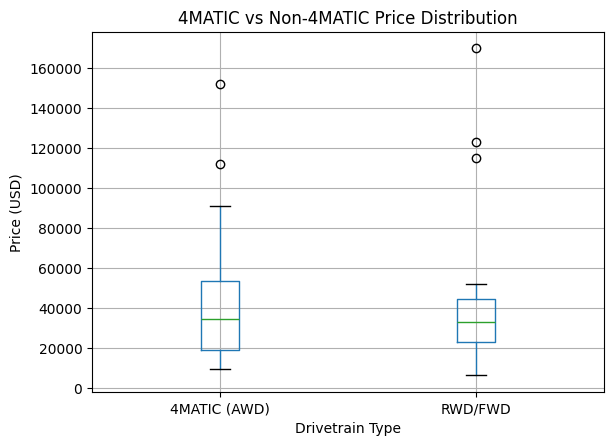

4MATIC Analysis
----------------
Drivetrain
4MATIC (AWD)    40066.918919
RWD/FWD         40840.058824
Name: Price_USD, dtype: float64


In [18]:
# Create readable labels
df['Drivetrain'] = df['Is_4MATIC'].map({0: 'RWD/FWD', 1: '4MATIC (AWD)'})

# Simple box plot
plt.figure()
df.boxplot(column='Price_USD', by='Drivetrain')
plt.title("4MATIC vs Non-4MATIC Price Distribution")
plt.suptitle("")  # Remove default subtitle
plt.xlabel("Drivetrain Type")
plt.ylabel("Price (USD)")
plt.show()

# Simple statistics
fourmatic_comparison = df.groupby('Drivetrain')['Price_USD'].mean()
print("4MATIC Analysis")
print("----------------")
print(fourmatic_comparison)

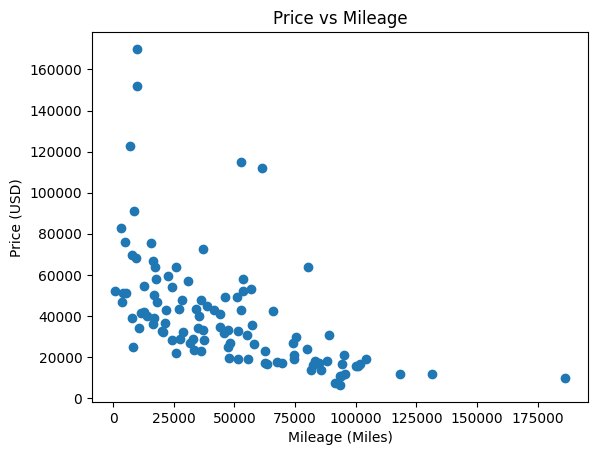

In [19]:
plt.figure()
plt.scatter(df['Mileage_Miles'], df['Price_USD'])
plt.title("Price vs Mileage")
plt.xlabel("Mileage (Miles)")
plt.ylabel("Price (USD)")
plt.show()

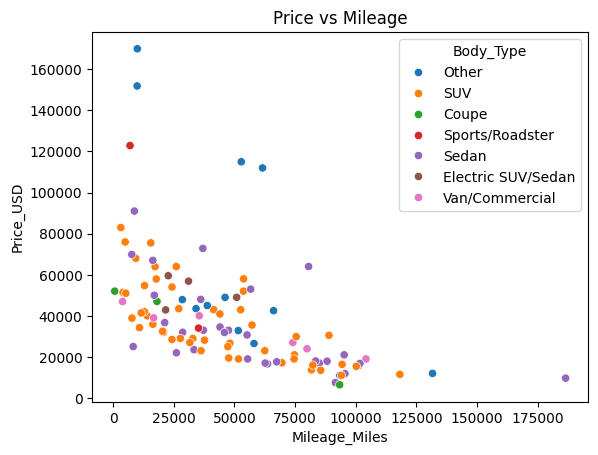

In [20]:
plt.figure()
sns.scatterplot(data=df, x='Mileage_Miles', y='Price_USD', hue='Body_Type')
plt.title("Price vs Mileage")
plt.show()

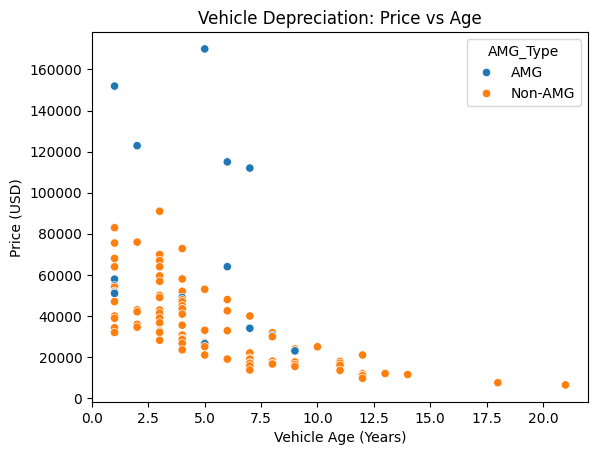

In [21]:
# Create readable label
df['AMG_Type'] = df['Is_AMG'].map({0: 'Non-AMG', 1: 'AMG'})

plt.figure()
sns.scatterplot(data=df, x='Vehicle_Age', y='Price_USD', hue='AMG_Type')

plt.title("Vehicle Depreciation: Price vs Age")
plt.xlabel("Vehicle Age (Years)")
plt.ylabel("Price (USD)")
plt.show()

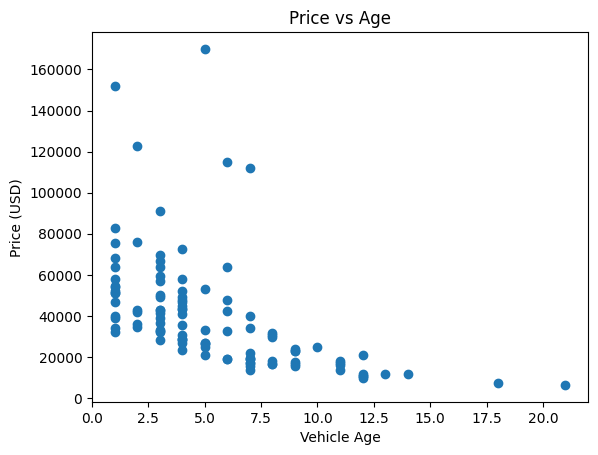

In [22]:
plt.figure()
plt.scatter(df['Vehicle_Age'], df['Price_USD'])
plt.title("Price vs Age")
plt.xlabel("Vehicle Age")
plt.ylabel("Price (USD)")
plt.show()

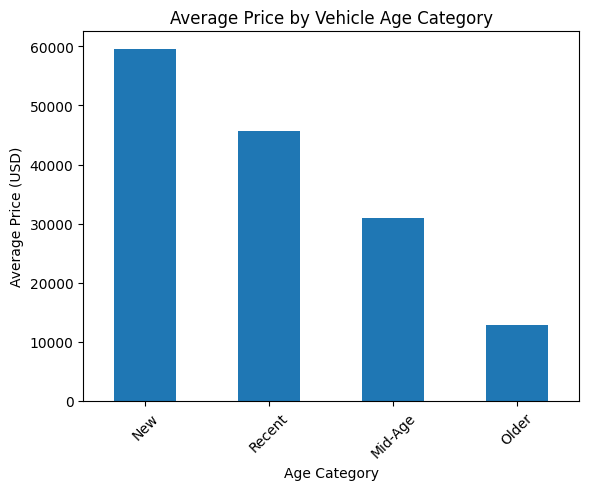

Average Price by Age Category
--------------------------------
Age_Category
New        59527.454545
Recent     45725.880952
Mid-Age    30876.483871
Older      12788.615385
Name: Price_USD, dtype: float64


In [23]:
age_cat_stats = df.groupby('Age_Category')['Price_USD'].mean().sort_values(ascending=False)

# Simple bar chart
plt.figure()
age_cat_stats.plot(kind='bar')
plt.title("Average Price by Vehicle Age Category")
plt.xlabel("Age Category")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.show()

# Print values
print("Average Price by Age Category")
print("--------------------------------")
print(age_cat_stats)


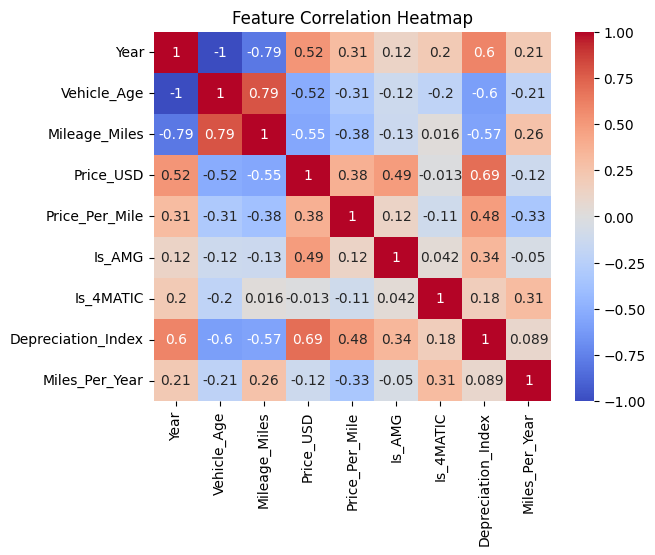

Features Most Correlated with Price
-----------------------------------
Price_USD             1.000000
Depreciation_Index    0.693973
Year                  0.517229
Is_AMG                0.488209
Price_Per_Mile        0.380353
Is_4MATIC            -0.012862
Miles_Per_Year       -0.117406
Vehicle_Age          -0.517229
Mileage_Miles        -0.547850
Name: Price_USD, dtype: float64


In [24]:
numerical_cols = ['Year', 'Vehicle_Age', 'Mileage_Miles', 'Price_USD',
                  'Price_Per_Mile', 'Is_AMG', 'Is_4MATIC',
                  'Depreciation_Index', 'Miles_Per_Year']

corr_matrix = df[numerical_cols].corr()

# Simple heatmap
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Correlation with Price
price_corr = corr_matrix['Price_USD'].sort_values(ascending=False)

print("Features Most Correlated with Price")
print("-----------------------------------")
print(price_corr)

In [25]:
print(df[numerical_cols].corr()['Price_USD'].sort_values(ascending=False))

Price_USD             1.000000
Depreciation_Index    0.693973
Year                  0.517229
Is_AMG                0.488209
Price_Per_Mile        0.380353
Is_4MATIC            -0.012862
Miles_Per_Year       -0.117406
Vehicle_Age          -0.517229
Mileage_Miles        -0.547850
Name: Price_USD, dtype: float64


## EDA

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [27]:
categorical_cols = [
    'Vehicle_Name',
    'Model_Series',
    'Trim_Level',
    'Body_Type',
    'Mileage_Category',
    'Age_Category',
    'Drivetrain',
    'AMG_Type'
]

In [28]:
numerical_cols = [
    'Year',
    'Vehicle_Age',
    'Is_AMG',
    'Is_4MATIC',
    'Mileage_Miles',
    'Price_USD',
    'Price_Per_Mile',
    'Depreciation_Index',
    'Miles_Per_Year',
    'Is_Luxury_Tier'
]

In [29]:
target = "Price_Category"

X = df.drop(columns=[target])
y = df[target]

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

In [34]:
results = {}

for name, model in models.items():
    
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.2f}%")

Logistic Regression Accuracy: 86.36%
Random Forest Accuracy: 90.91%
Decision Tree Accuracy: 100.00%
SVM Accuracy: 77.27%
AdaBoost Accuracy: 31.82%


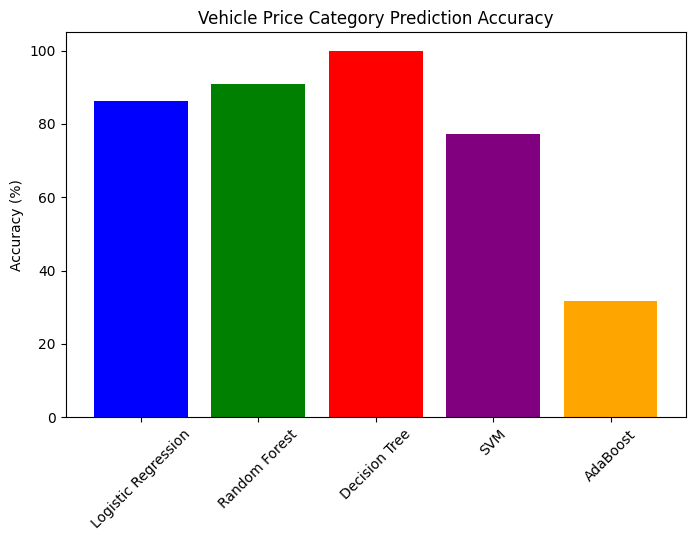

In [35]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(),
        color=['blue','green','red','purple','orange'])

plt.ylabel("Accuracy (%)")
plt.title("Vehicle Price Category Prediction Accuracy")
plt.xticks(rotation=45)
plt.show()

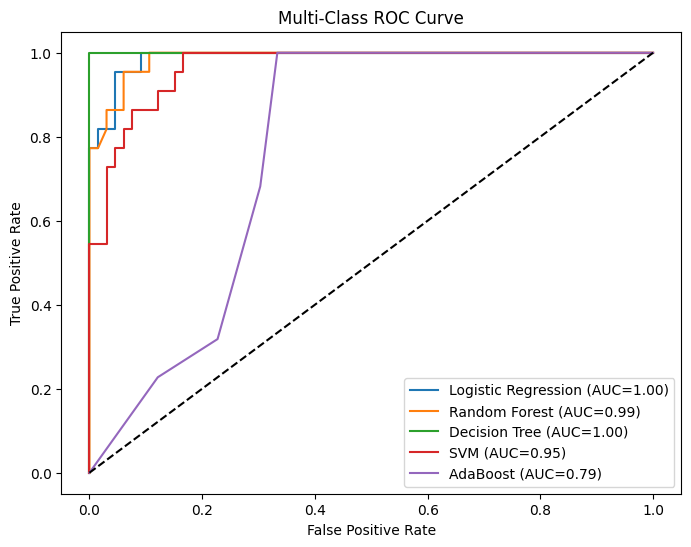

In [36]:
classes = np.unique(y_encoded)
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8,6))

for name, model in models.items():
    
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_score = pipeline.predict_proba(X_test)
    
    auc_score = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend()
plt.show()

## Thank you..pls upvote!!!!